In [1]:
from google.colab import files
uploaded = files.upload()

Saving Churn_Modelling.csv to Churn_Modelling.csv


In [3]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [5]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn

In [6]:
import io
 


In [32]:
s = pd.read_csv(io.BytesIO(uploaded['Churn_Modelling.csv']))
print(s)

      RowNumber  CustomerId    Surname  CreditScore Geography  Gender  Age  \
0             1    15634602   Hargrave          619    France  Female   42   
1             2    15647311       Hill          608     Spain  Female   41   
2             3    15619304       Onio          502    France  Female   42   
3             4    15701354       Boni          699    France  Female   39   
4             5    15737888   Mitchell          850     Spain  Female   43   
...         ...         ...        ...          ...       ...     ...  ...   
9995       9996    15606229   Obijiaku          771    France    Male   39   
9996       9997    15569892  Johnstone          516    France    Male   35   
9997       9998    15584532        Liu          709    France  Female   36   
9998       9999    15682355  Sabbatini          772   Germany    Male   42   
9999      10000    15628319     Walker          792    France  Female   28   

      Tenure    Balance  NumOfProducts  HasCrCard  IsActiveMemb

In [33]:
s.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


3 a)Univariate Analysis


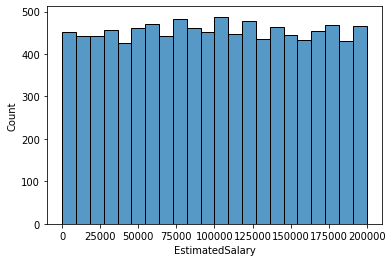

In [34]:
sns.histplot(s['EstimatedSalary'])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


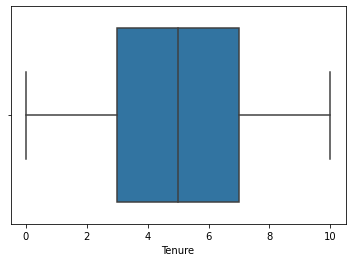

In [10]:
sns.boxplot(s['Tenure'])

3 b) Bi - Variate Analysis


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


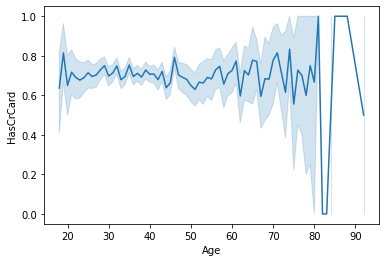

In [35]:
sns.lineplot(s['Age'], s['HasCrCard'])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


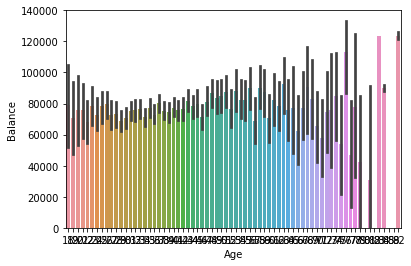

In [36]:
sns.barplot(s['Age'], s['Balance'])

3 c)Multi - Variate Analysis


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


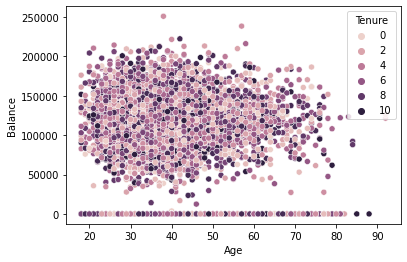

In [37]:
sns.scatterplot(s['Age'], s['Balance'], hue = s['Tenure'])

In [ ]:
sns.pairplot(s)

4) Descriptive Statistics

In [ ]:
s.mean()

In [ ]:
s.median()

In [ ]:
s.mode()

5)Handle the Missing values

In [ ]:
s.isnull().any()

In [ ]:
s.isnull().sum()

6)Find the outliers and replace the outliers

In [ ]:

s["Tenure"] = np.where(s["Tenure"] >10, np.median,s["Tenure"])
s["Tenure"]


7)Check for Categorical columns and perform encoding.

In [ ]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
le = LabelEncoder()
oneh = OneHotEncoder()
s['Geography'] = le.fit_transform(s['Geography'])

In [ ]:
s.head()

In [ ]:
s['Balance'] = le.fit_transform(s['Balance'])
s['NumOfProducts'] = le.fit_transform(s['NumOfProducts'])

In [ ]:
s.head()

8. Split the data into dependent and independent variables.


In [ ]:
#InDependent
x = s.iloc[:, 0:6]

In [ ]:
x

In [27]:
#Dependent
Y=s.iloc[:,-1].values

In [ ]:
Y

9)Scale the independent variables


In [ ]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()
s[["RowNumber"]]=scaler.fit_transform(a[["RowNumber"]])
print(s)

10) Split the data into training and testing

In [ ]:
from sklearn.model_selection import train_test_split
train_size=0.8
X=s.drop(columns=['EstimatedSalary']).copy()
Y=s['EstimatedSalary']
X_train, X_rem, Y_train, Y_rem=train_test_split(X,Y,train_size=0.8)
test_size=0.5
X_valid,X_test,Y_valid,Y_test=train_test_split(X_rem,Y_rem,test_size=0.5)
print(X_train.shape),print(Y_train.shape)
print(X_valid.shape),print(Y_valid.shape)
print(X_test.shape),print(Y_test.shape)